In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss

In [6]:
import category_encoders as ce

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option('display.max_columns', 120)

---

In [9]:
tr = pd.read_csv('train.csv')
tr.sample(4)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
71376,71376,0.474449,47,0.794462,-1.03048,155.19,3.246600,102.79500,0.027033,-50.1229,1.39384,-2.390930,-0.827824,123.369,5.65173,1.302890,0.046784,7637376,0.008133,0.790701,-0.570309,0.022222,9.17040,521.417,12.57470,-0.906944,7.33411,137.206,2877,15.516200,5.04168,1.15176,14.91730,1.385030,1.778230,123.177,247.9420,7.31371,-0.267871,2.29624,0.897456,4.650870,2.49443,0.138535,0.517834,23.9569,264.40600,11.45320,5.00238,0.495185,31.2359,1.56975,-1.266150,73.7054,65.7488,-0.276847,532,-73.4601,1.43380,90.2293,-0.025974,3.406720e+09,95.8981,5.95068,0.204937,0.989615,0.307029,0.173217,1.037680,4.69918,2.47472,87.0517,0.091170,22.6823,0.878986,3.59033,1120.150,0.026513,0.301888,7.27940,1.12579,1.95357,-0.003539,-0.611387,1.155370,3.62504,4.35986,13,-0.268461,12.57210,2.31403,0.187394,254.2490,12.65940,0.88677,-0.032069,-5.71816,2.832990,0.424686,1.58313,6.62883,4
22466,22466,0.639234,61,-3.379720,-1.03883,2217.63,3.507010,53.22380,0.444172,222.1180,1.28925,-0.858559,-0.260255,116.379,10.31440,0.819461,0.372160,232958,0.027288,0.372198,-0.336813,0.928475,8.57671,1604.240,4.39955,-1.381900,4.84299,133.528,87665,0.249267,10.32900,1.21464,7.86921,-0.956483,1.617090,150.743,17.2504,6.50579,0.958795,1.16343,-0.574405,-0.035982,1.08413,0.074620,0.558961,30.5663,175.49000,6.60382,4.89456,0.315382,127.8960,1.88465,0.982317,405.9970,86.8305,0.316015,1060,743.3610,1.52228,75.3455,1.200920,1.675510e+09,59.1974,5.94137,0.240311,1.141180,0.468023,0.073028,1.056350,1.16725,1.32722,79.6121,0.132006,11.8234,2.174750,3.67250,377.241,-0.007509,2.407220,6.92967,1.10526,1.40964,0.020725,-0.505528,1.793390,1.90060,4.18811,106,0.434165,6.68122,1.55631,0.884311,507.3910,39.30110,1.67590,-0.417349,-6.59919,0.013649,0.802719,1.39149,7.12030,4
174997,174997,0.483368,126,-0.029585,-0.79681,12296.00,0.874421,519.63300,0.988022,-161.8030,1.13396,-0.867653,1.042890,133.044,8.34825,1.669820,0.120234,9834599,-0.006456,-1.030870,0.557522,0.250688,10.75200,814.503,10.33560,-0.867626,7.90903,150.675,12722,11.650700,1.77767,1.20287,5.36450,0.900963,0.686388,126.162,33.4955,4.55081,1.071090,1.28418,1.024400,3.154210,2.05201,0.283847,0.434723,199.3060,-4.30968,7.29011,4.48646,0.270948,19.8764,1.64760,0.932470,-5925.9400,101.6790,-0.304877,2189,-303.7980,1.66125,63.6762,1.136170,3.318960e+09,28.0579,7.04481,0.203798,1.099190,0.598895,0.162302,0.685810,-2.15613,1.18374,27.0901,0.075883,63.9077,2.276590,3.92997,140.190,-0.834160,3.868330,6.48289,1.12996,3.55834,-0.015949,-0.231913,-0.039746,5.25198,4.34000,513,0.389964,3.06051,1.43190,0.193884,5937.5800,45.70960,1.55358,0.348556,3.90045,1.987870,0.333464,2.11156,13.20100,20
151950,151950,0.586230,56,-0.492578,0.98160,27129.70,10.853300,2.38389,-0.087470,55.3981,1.17591,-7.345080,-0.243559,151.463,11.04130,1.593280,1.198730,-395910,-0.006197,0.345935,-0.406698,0.286296,11.26280,976.452,5.22017,-0.843118,13.76620,149.500,89208,2.077570,2.19096,1.16434,4.49047,0.001520,1.249990,129.116,22.7371,3.88311,1.067770,-1.26564,0.769016,0.958170,2.85960,0.012018,0.419923,27.0177,13.00710,7.82287,3.67894,-0.062556,240.9340,1.34547,1.440900,22715.9000,92.5722,-0.508981,1155,138.7290,1.48864,89.3980,0.365584,7.710350e+09,49.3146,0.74659,0.301911,1.058000,0.400341,0.347950,0.965956,7.40844,1.49590,17.7737,-0.006230,62.6893,2.438740,5.29658,8301.610,-0.008172,1.156060,6.75713,1.15669,1.71039,0.011690,-0.532008,-0.618105,1.12640,4.80966,78,-0.254476,4.57163,7.70950,0.457851,-49.2408,3.88891,1.50131,0.424835,11.85070,2.436040,0.764470,2.23633,6.84183,1


<AxesSubplot:xlabel='loss', ylabel='Density'>

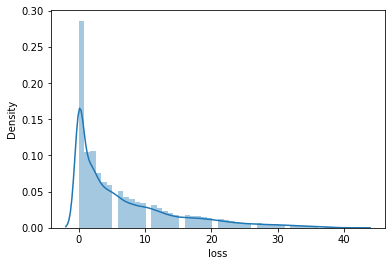

In [22]:
sns.distplot((tr.loss))